In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Importação de bibliotecas

In [3]:
# Importando as bibliotecas estudadas durante o curso
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1) Análise inicial

Carregar e Visualizar base de dados, Dimensão, tipos de dados e resumo estatistico

In [81]:
# Importando o dataset
dataset = pd.read_csv("/content/drive/MyDrive/CURSO FEA - PYTHON/PROJETO FINAL/dados_estudantes.csv") #index_col=0
# Verificando as primeiras linhas do dataset
dataset.head(5)

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [5]:
# Conferindo a dimensão e tipos de dados do dataset
print(dataset.shape)
print(dataset.dtypes)


(2392, 15)
StudentID              int64
Age                    int64
Gender                 int64
Ethnicity              int64
ParentalEducation      int64
StudyTimeWeekly      float64
Absences               int64
Tutoring               int64
ParentalSupport        int64
Extracurricular        int64
Sports                 int64
Music                  int64
Volunteering           int64
GPA                  float64
GradeClass           float64
dtype: object


In [82]:
# Resumo estatisticos dos dados
dataset.describe()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


### 2) Tratamento Valores ausente ou nulos

In [ ]:
# Conferindo a quantidade de valores ausentes e nulos
print("Valores nulos:\n", dataset.isnull().sum())
print("\n\nValores ausentes:\n", dataset.isna().sum())

Valores nulos:
 StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64


Valores ausentes:
 StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64


###### OK. Não será preciso tratar (removendo, preenchendo...) esses valores nos dados

### 3) Renomeação de colunas e valores dos dados

Renomeando colunas

In [83]:
traducao_colunas = {
    "StudentID": "ID_Aluno",
    "Age": "Idade",
    "Gender": "Genero",
    "Ethnicity": "Etnia",
    "ParentalEducation": "Escolaridade_Pais",
    "StudyTimeWeekly": "Horas_Estudo_Semanais",
    "Absences": "Faltas",
    "Tutoring": "Aulas_Particulares",
    "ParentalSupport": "Apoio_Pais",
    "Extracurricular": "Atividades_Extracurriculares",
    "Sports": "Esportes",
    "Music": "Musica",
    "Volunteering": "Voluntariado",
    "GPA": "Media_Notas",
    "GradeClass": "Classificacao_Notas"
}

dataset = dataset.rename(columns = traducao_colunas)
dataset

,ID_Aluno,Idade,Genero,Etnia,Escolaridade_Pais,Horas_Estudo_Semanais,Faltas,Aulas_Particulares,Apoio_Pais,Atividades_Extracurriculares,Esportes,Musica,Voluntariado,Media_Notas,Classificacao_Notas
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0


Renomeando valores dos dados



In [78]:
# Classificacao das Notas
mapeamento_notas = {
  0: 'A',  # Nota 0 -> F
  1: 'B',  # Nota 1 -> E
  2: 'C',  # Nota 2 -> D
  3: 'D',  # Nota 3 -> C
  4: 'E',  # Nota 4 -> B
}

dataset['Classificacao_Notas'] = dataset['Classificacao_Notas'].map(mapeamento_notas)

In [43]:
# Genero
mapeamentoGenero = {
  0: "Masculino",
  1: "Feminino"
}

dataset['Genero'] = dataset["Genero"].map(mapeamentoGenero)

In [79]:
# Etnia
mapeamentoEtnia = {
  0: 'Caucasiano',
  1: 'Afrodescendente',
  2: 'Asiático',
  3: 'Outra'
}

dataset["Etnia"] = dataset["Etnia"].map(mapeamentoEtnia)

In [45]:
# Apoio dos pais
mapeamentoApoioPais = {
  0: 'Nenhum',
  1: 'Baixo',
  2: 'Moderado',
  3: 'Alto',
  4: 'Muito Alto'
}

dataset["Apoio_Pais"] = dataset["Apoio_Pais"].map(mapeamentoApoioPais)

In [46]:
# Escolaridade dos pais
mapeamentoEscolaridadePais = {
  0: 'Nenhum',
  1: 'Ensino Médio',
  2: 'Alguma Faculdade',
  3: 'Graduação',
  4: 'Pós-Graduação ou Superior'
}

dataset["Escolaridade_Pais"] = dataset["Escolaridade_Pais"].map(mapeamentoEscolaridadePais)

In [ ]:
dataset.head(10)

,ID_Aluno,Idade,Genero,Etnia,Escolaridade_Pais,Horas_Estudo_Semanais,Faltas,Aulas_Particulares,Apoio_Pais,Atividades_Extracurriculares,Esportes,Musica,Voluntariado,Media_Notas,Classificacao_Notas
0,1001,17,Feminino,Caucasiano,Alguma Faculdade,19.833723,7,1,Moderado,0,0,1,0,2.929196,C
1,1002,18,Masculino,Caucasiano,Ensino Médio,15.408756,0,0,Baixo,0,0,0,0,3.042915,B
2,1003,15,Masculino,Asiático,Graduação,4.210570,26,0,Moderado,0,0,0,0,0.112602,E
3,1004,17,Feminino,Caucasiano,Graduação,10.028829,14,0,Alto,1,0,0,0,2.054218,D
4,1005,17,Feminino,Caucasiano,Alguma Faculdade,4.672495,17,1,Alto,0,0,0,0,1.288061,E
5,1006,18,Masculino,Caucasiano,Ensino Médio,8.191219,0,0,Baixo,1,0,0,0,3.084184,B
6,1007,15,Masculino,Afrodescendente,Ensino Médio,15.601680,10,0,Alto,0,1,0,0,2.748237,C
7,1008,15,Feminino,Afrodescendente,Pós-Graduação ou Superior,15.424496,22,1,Baixo,1,0,0,0,1.360143,E
8,1009,17,Masculino,Caucasiano,Nenhum,4.562008,1,0,Moderado,0,1,0,1,2.896819,C
9,1010,16,Feminino,Caucasiano,Ensino Médio,18.444466,0,0,Alto,1,0,0,0,3.573474,A


In [ ]:
dataset.dtypes

,0
ID_Aluno,int64
Idade,int64
Genero,object
Etnia,object
Escolaridade_Pais,object
Horas_Estudo_Semanais,float64
Faltas,int64
Aulas_Particulares,int64
Apoio_Pais,object
Atividades_Extracurriculares,int64


---------------------------------------------------------------------------
**Considerações Iniciais**

De inicio, renomeou-se as colunas e algumas valores, depois foi feita um resumo estatístico, para obter uma visão geral de media, mediana, desvio padrao, valores minimos e maximos de cada variaveis, avaliando possíveis valores extremos.

Foi conferido se havia valores ausentes ou nulos, por precaução.

Optou-se por não normalizar os dados, deixa-os na escala original, para uma interpretacao mais intuitiva; caso fosse necessarios iria aplicar a algumas variáveis numéricas contínuas (Horas_Estudo_Semanais, Faltas, e Media_Notas).



---------------------------------------------------------------------------

### 4) Análise exploratória

###### - Análise da correlação entre variáveis (matriz de correlação), Análise e Visualização em gráficos e tabelas (Histogramas, grafico de pizza, grafico de barras, grafico de linhas, grafico de dispersao, etc)

- Histogramas: visualizaçao da distribuição das variáveis numéricas
- Gráfico de linha: evolução ao longo do tempo

**Pergunta Norteadora:**
- Quais fatores demográficos, acadêmicos e comportamentais mais influenciam a classificação e a média de notas dos estudantes?
- Alunos que participam de atividades extracurriculares têm melhor desempenho?
- O número de faltas impacta a classificação?
- Há diferenças de desempenho por idade, gênero ou etnia?

Investigação da relação entre Classificacao_Notas e Media_Notas com outras variáveis (ex: gênero, horas de estudo, faltas, etc).

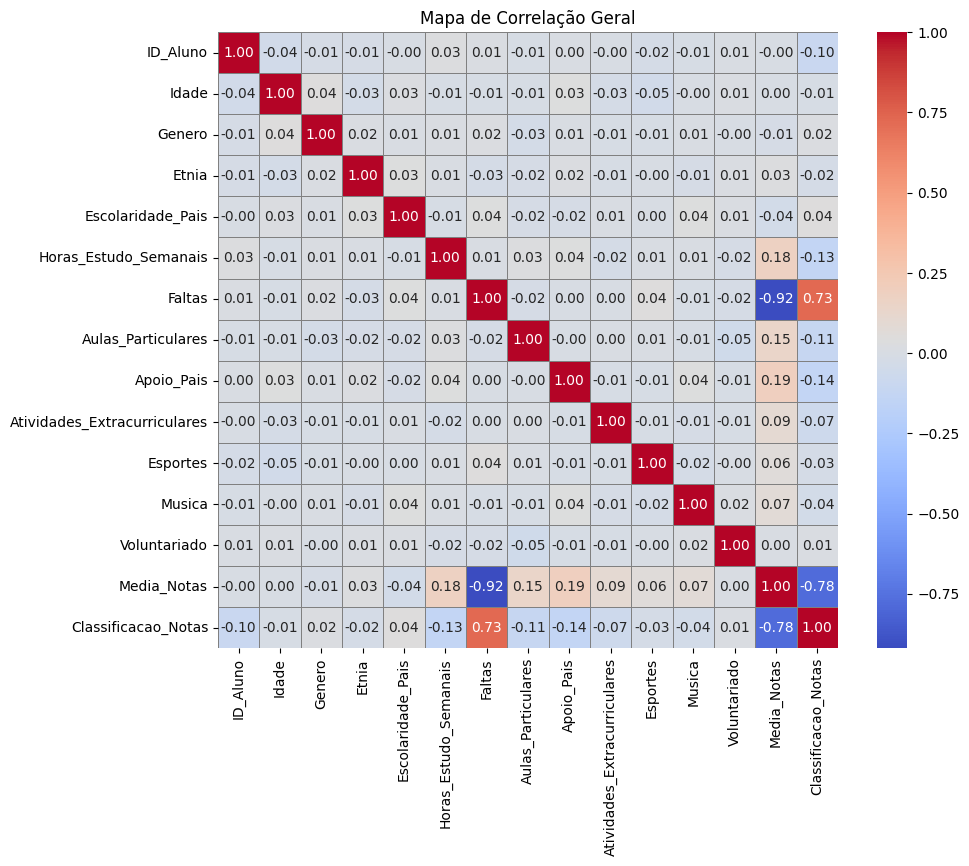

In [31]:
# Correlação entre variveis
plt.figure(figsize=(10, 8))
sns.heatmap(dataset.corr(),
    annot=True,    # Mostra os valores na célula
    fmt=".2f",     # Formato numérico (2 casas decimais)
    cmap="coolwarm",
    linewidths=0.5,   # Adiciona linhas entre as células
    linecolor="grey"
)
plt.title("Mapa de Correlação Geral", fontsize=12)
plt.show()


# (obs: todas as variaveis devem ser do tipo int)

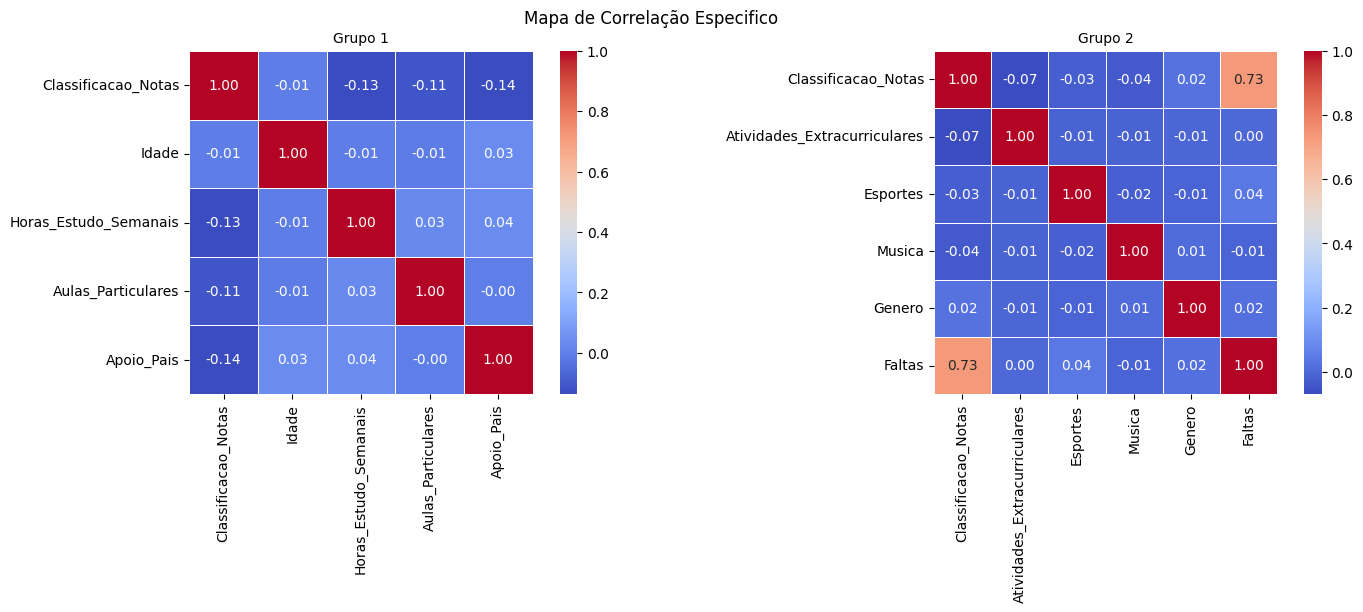

In [32]:
# Filtrando uma correlação entre Classificacao_Notas e outras variáveis
variaveis = ['Classificacao_Notas', 'Idade', 'Horas_Estudo_Semanais', 'Aulas_Particulares', 'Apoio_Pais']
variaveis2 = ['Classificacao_Notas', 'Atividades_Extracurriculares', 'Esportes', 'Musica', 'Genero', 'Faltas']

matrizCorrelacao = dataset[variaveis].corr()
matrizCorrelacao2 = dataset[variaveis2].corr()

plt.figure(figsize=(15, 6))
plt.suptitle("Mapa de Correlação Especifico", fontsize=12)

plt.subplot(1,2,1)
sns.heatmap(matrizCorrelacao, annot=True, cmap='coolwarm', square=True, linewidths=0.5, fmt=".2f")
plt.title("Grupo 1", fontsize=10)
plt.subplot(1,2,2)
sns.heatmap(matrizCorrelacao2, annot=True, cmap='coolwarm', square=True, linewidths=0.5, fmt=".2f")
plt.title("Grupo 2", fontsize=10)

plt.tight_layout()
plt.show()

- Conclusão:

Podemos retirar insights através de comparações entre a variável Classificacao_Notas e Faltas, pois possui uma alta correlação. Além disso, podemos avaliá-la com outras variáveis, como Horas de Estudo Semanais, Aulas particulares, Apoio dos pais e Atividade extracurriculares, apesar de uma correlação bem mais fraca.

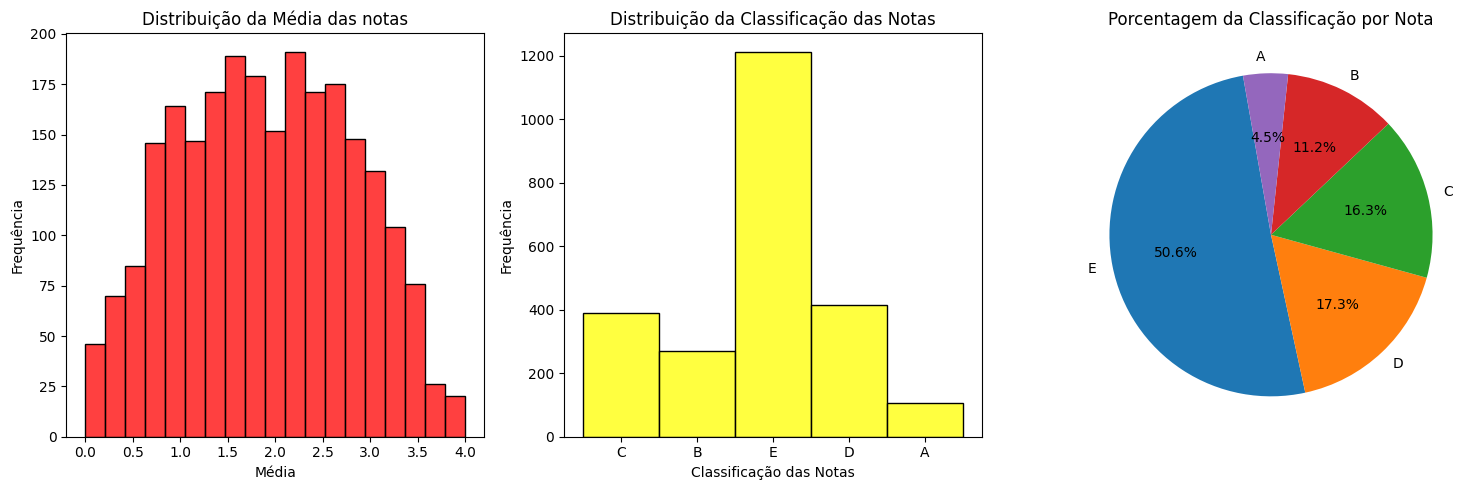

In [66]:
# Analisando a distribuição da media e classificacao das notas
plt.figure(figsize=(15,5))

# Media das notas
plt.subplot(1,3,1)
# plt.hist(dataset['Media_Notas'], bins=10, color='red')                         # histograma
sns.histplot(data=dataset, x="Media_Notas", color='red', kde=False)
plt.title('Distribuição da Média das notas')
plt.xlabel('Média')
plt.ylabel('Frequência')

# Classificacao das notas
plt.subplot(1,3,2)
# plt.hist(dataset['Classificacao_Notas'], bins=5, color='yellow')               # histograma
sns.histplot(data=dataset, x="Classificacao_Notas", color='yellow', kde=False)
plt.title('Distribuição da Classificação das Notas')
plt.xlabel('Classificação das Notas')
plt.ylabel('Frequência')

plt.subplot(1,3,3)
distClassificacao = dataset['Classificacao_Notas'].value_counts()
distClassificacao.plot.pie(autopct='%1.1f%%', startangle=100)                   # grafico de pizza # figsize=(8, 8)
plt.title('Porcentagem da Classificação por Nota')
plt.ylabel('')

plt.tight_layout()
plt.show()

- Conclusões:

Pode-se observar pelos dois histogramas que a maior concentração da media das notas encontra-se em torno de 2.0, ou seja uma turma com rendimento mediano. Alem disso, observa-se juntamente com o grafico de pizza que a frequencia maior está dando uma maior concentração e percentual na nota E, indicando que muitos alunos estão com baixo rendimento, e uma minoria com nota alta (A).

- Perguntas:

Sendo assim, quais as causas dessas consequencias (muita nota baixa)?

<ipython-input-118-c23a62360603>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Classificacao_Notas", y="Faltas", data=dataset, order=ordenacaoEixoX,palette='viridis')  # grafico de barras
<ipython-input-118-c23a62360603>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Classificacao_Notas", y="Horas_Estudo_Semanais", data=dataset, order=ordenacaoEixoX, palette='viridis') # grafico de barras
<ipython-input-118-c23a62360603>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Classificacao_Notas', y='Horas_Estudo_Semanais', data=dat

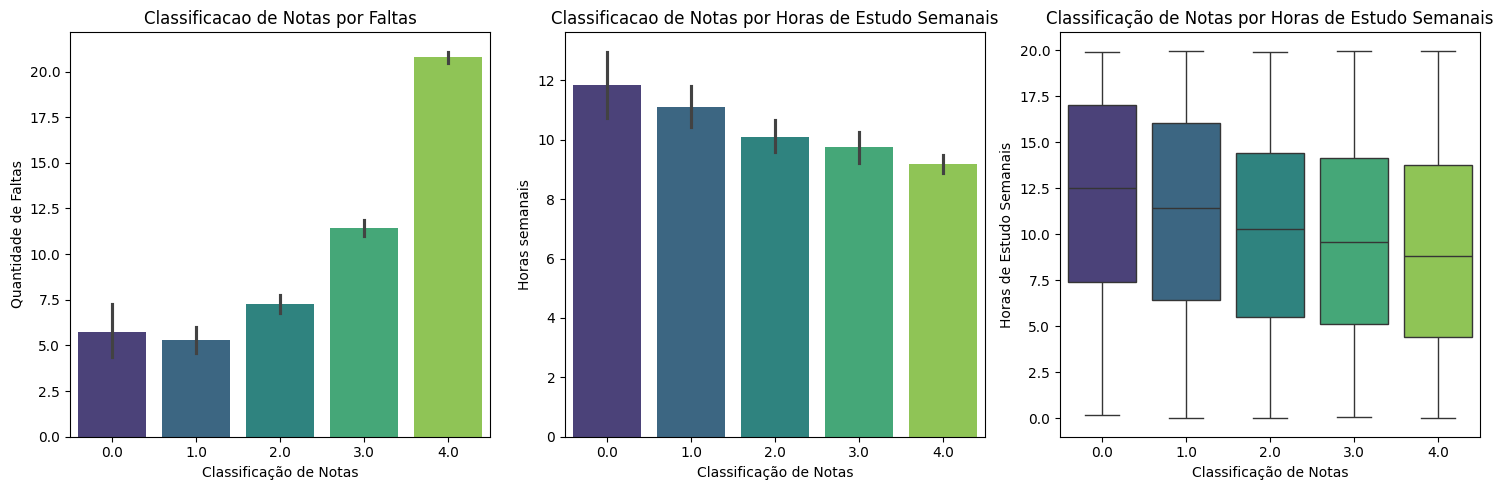

In [118]:
# Analisando a classificação das notas segundo as faltas e horas de estudos
ordenacaoEixoX = sorted(dataset["Classificacao_Notas"].unique()) # para o parametro order, onde retorna os valores únicos na coluna e ordena

plt.figure(figsize=(15,5))

# Por Faltas
plt.subplot(1,3,1)
sns.barplot(x="Classificacao_Notas", y="Faltas", data=dataset, order=ordenacaoEixoX,palette='viridis')  # grafico de barras
plt.title('Classificacao de Notas por Faltas')
plt.xlabel('Classificação de Notas')
plt.ylabel('Quantidade de Faltas')

# Por Horas de estudo
plt.subplot(1,3,2)
sns.barplot(x="Classificacao_Notas", y="Horas_Estudo_Semanais", data=dataset, order=ordenacaoEixoX, palette='viridis') # grafico de barras
plt.title('Classificacao de Notas por Horas de Estudo Semanais')
plt.xlabel('Classificação de Notas')
plt.ylabel('Horas semanais')

plt.subplot(1,3,3)
# plt.figure(figsize=(10, 6))
sns.boxplot(x='Classificacao_Notas', y='Horas_Estudo_Semanais', data=dataset, order=ordenacaoEixoX, palette='viridis') # grafico de dispersao
plt.title('Classificação de Notas por Horas de Estudo Semanais')
plt.xlabel('Classificação de Notas')
plt.ylabel('Horas de Estudo Semanais')

plt.tight_layout()
plt.show()

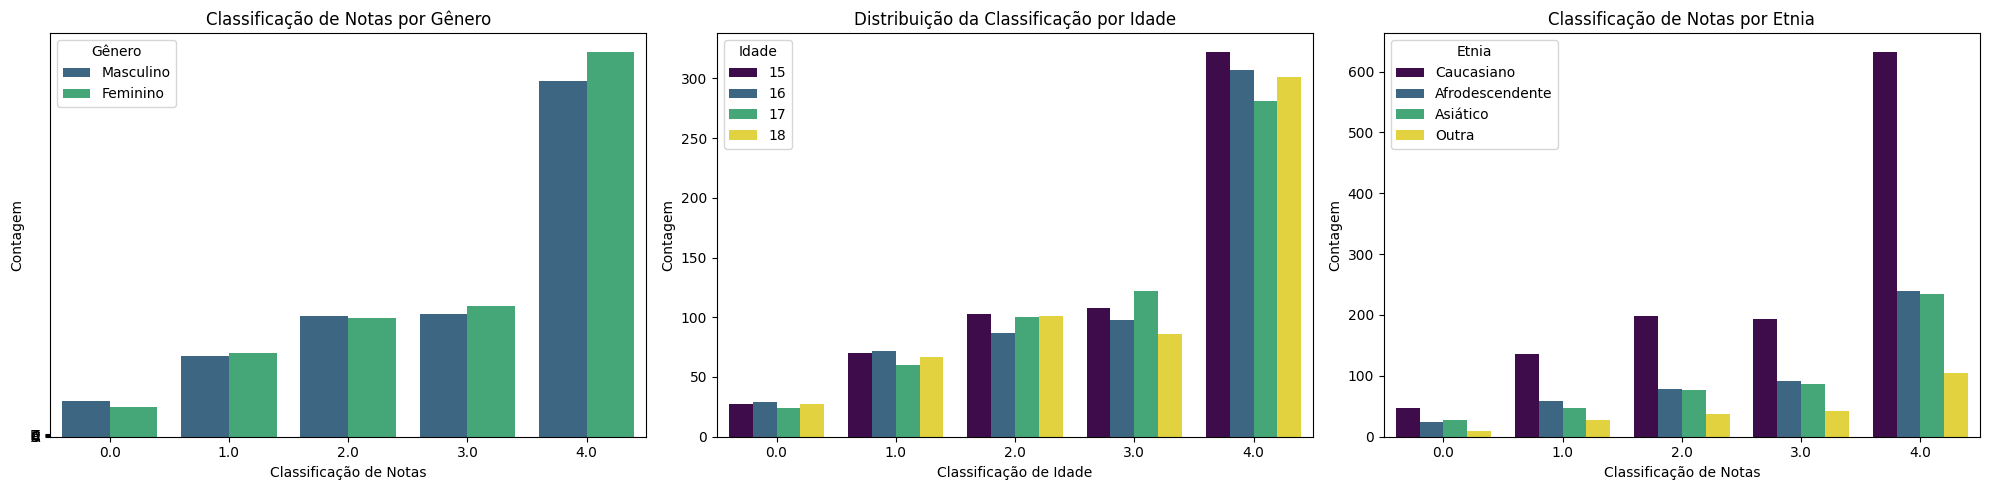

In [122]:
# Analisando a classificação das notas segundo etnia e genero - baixa correlação
plt.figure(figsize=(20,5))

# Genero
plt.subplot(1,3,1)
sns.countplot(x='Classificacao_Notas', hue='Genero', data=dataset, palette='viridis') # Gráfico de barras com contagem
plt.title('Classificação de Notas por Gênero')
plt.xlabel('Classificação de Notas')
plt.ylabel('Contagem')
plt.yticks(ticks=range(5), labels=['A', 'B', 'C', 'D', 'E'])
plt.legend(title='Gênero', labels=['Masculino', 'Feminino'])

# Idade
plt.subplot(1,3,2)
sns.countplot(x='Classificacao_Notas', hue='Idade', data=dataset, palette='viridis')  # Gráfico de barras com contagem
plt.title('Distribuição da Classificação por Idade')
plt.xlabel('Classificação de Idade')
plt.ylabel('Contagem')
plt.legend(title='Idade')

# Etnia
plt.subplot(1,3,3)
sns.countplot(x='Classificacao_Notas', hue='Etnia', data=dataset, palette='viridis') # Gráfico de barras com contagem
plt.title('Classificação de Notas por Etnia')
plt.xlabel('Classificação de Notas')
plt.ylabel('Contagem')
plt.legend(title='Etnia', labels=['Caucasiano', 'Afrodescendente', 'Asiático', 'Outra'])


# sns.barplot(x="Classificacao_Notas", y="Etnia", data=dataset, palette='viridis')      # Gráfico de barras
# plt.title('Classificação de Notas por Etnia', fontsize=10)
# plt.xlabel('Classificação de Notas')
# plt.ylabel('Contagem')

plt.tight_layout()
plt.show()

In [120]:
# Tabela cruzada entre Classificacao_Notas e genero
pd.crosstab(dataset['Classificacao_Notas'], dataset['Genero'], normalize='index') * 100

Genero,0,1
Classificacao_Notas,,
0.0,54.205607,45.794393
1.0,49.070632,50.929368
2.0,50.383632,49.616368
3.0,48.550725,51.449275
4.0,48.059455,51.940545


<ipython-input-129-ec23d023a5dd>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Classificacao_Notas', y='Idade', data=dataset, palette='viridis')


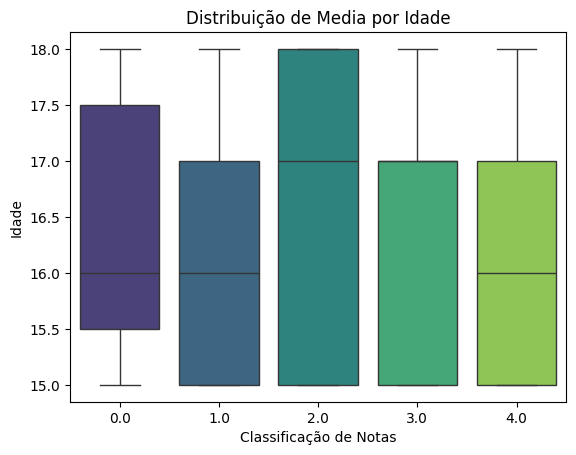

In [129]:
sns.boxplot(x='Classificacao_Notas', y='Idade', data=dataset, palette='viridis')
plt.title('Distribuição de Media por Idade')
plt.xlabel('Classificação de Notas')
plt.ylabel('Idade')
plt.show()

In [ ]:
# Usando sns.barplot para mostrar a soma de 'Media das notas' por 'Classificacao_Notas' e 'Etnia'
# media_faltas = dataset.groupby(['Classificacao_Notas', 'Etnia'])['Media_Notas'].sum().reset_index()
# sns.barplot(x='Classificacao_Notas', y='Media_Notas', hue='Etnia', data=media_faltas)

- Conclusões:

Segundo as analises feita acima, observa-se que a quantidade de faltas impacta diretamente na nota do aluno.
Embora a correlação tenha dada pequena, analisou-se também o impacto de passar mais horas em estudo, embora pequena. Nisso, os alunos com notas E estudaram em media 9h e alunos nota A ou B estudaram 2 a 3 horas a mais indicando, assim, uma pequena vantagem no desempenho.

Em contrapartida, a etnia, idade e genero não foram tão significativos para a análise, pois não tiveram tanto impacto assim.


- Perguntas:

Podemos analisar que fatores levam a tantas faltas e notas baixas, como por exemplo:
* Está tendo apoio dos pais?
* Será pela idade?
* Ou devido a atividades extracurriculares, esportes, influencia da musica?
* Ou ainda à aulas particulares?





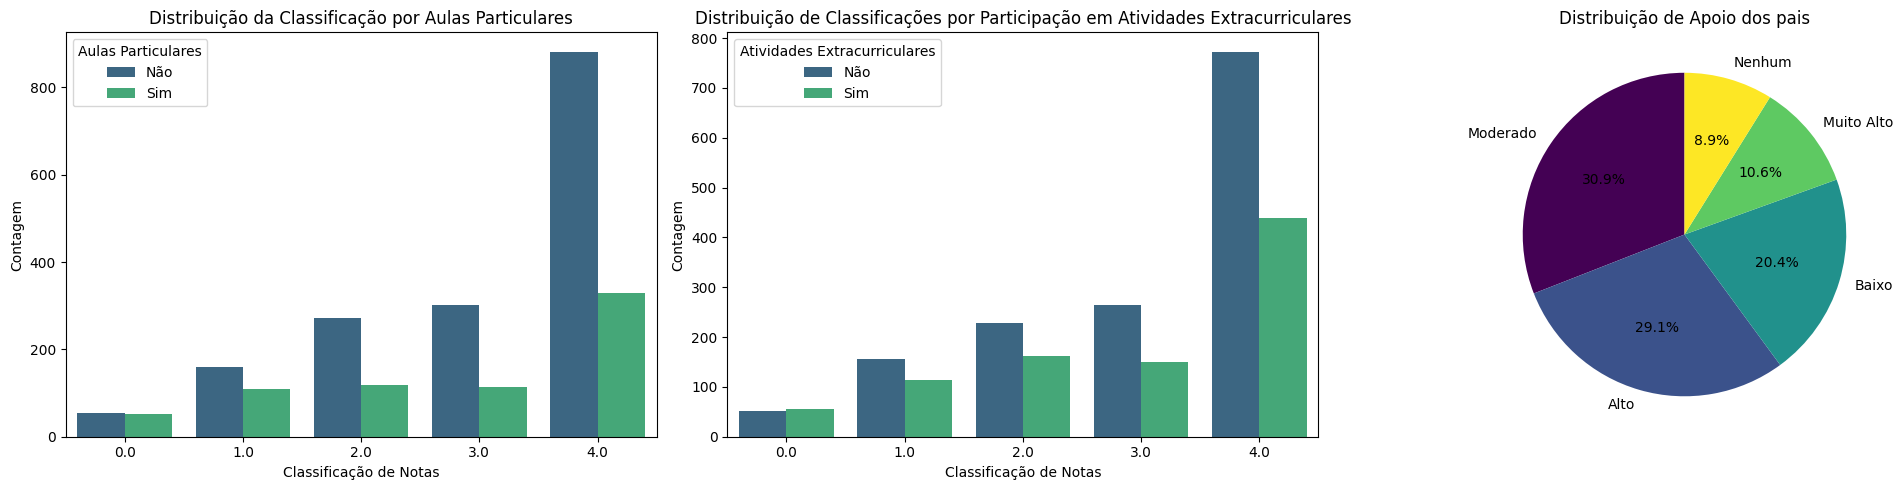

In [130]:
# Analisando a classificação das notas segundo Aulas particulares, atividades extracurriculares e apoio dos pais
plt.figure(figsize=(20,5))

# Aulas particulareS
plt.subplot(1,3,1)
sns.countplot(x='Classificacao_Notas', hue='Aulas_Particulares', data=dataset, palette='viridis')   # Gráfico de barras com contagem
plt.title('Distribuição da Classificação por Aulas Particulares')
plt.xlabel('Classificação de Notas')
plt.ylabel('Contagem')
plt.legend(title='Aulas Particulares', labels=['Não', 'Sim'])

# Atividades extracurriculares e desempenho
plt.subplot(1,3,2)
sns.countplot(x='Classificacao_Notas', hue='Atividades_Extracurriculares', data=dataset, palette='viridis')
plt.title('Distribuição de Classificações por Participação em Atividades Extracurriculares')
plt.xlabel('Classificação de Notas')
plt.ylabel('Contagem')
plt.legend(title='Atividades Extracurriculares', labels=['Não', 'Sim'])

# Apoio dos pais
plt.subplot(1,3,3)
distClassificacaoPais = dataset['Apoio_Pais'].value_counts()
rotulos = {0: "Nenhum", 1: "Baixo", 2: "Moderado", 3: "Alto", 4: "Muito Alto"}  # nomeação dos rotulos
labels_personalizados = [rotulos[x] for x in distClassificacaoPais.index]
distClassificacaoPais.plot.pie(labels=labels_personalizados, autopct='%1.1f%%', startangle=90, colormap='viridis')
plt.title('Distribuição de Apoio dos pais')
plt.ylabel('')

plt.tight_layout()
plt.show()

In [ ]:
#Tabela cruzada entre classificacao de notas e atividades extracurriculares
pd.crosstab(dataset['Classificacao_Notas'], dataset['Atividades_Extracurriculares'], normalize='index') * 100

Atividades_Extracurriculares,0,1
Classificacao_Notas,,
0.0,48.598131,51.401869
1.0,57.992565,42.007435
2.0,58.567775,41.432225
3.0,64.009662,35.990338
4.0,63.831544,36.168456


In [131]:
#Tabela cruzada entre classificacao de notas e atividades extracurriculares
pd.crosstab(dataset['Classificacao_Notas'], dataset['Aulas_Particulares'], normalize='index') * 100

Aulas_Particulares,0,1
Classificacao_Notas,,
0.0,51.401869,48.598131
1.0,59.479554,40.520446
2.0,69.820972,30.179028
3.0,72.705314,27.294686
4.0,72.832370,27.167630


- Conclusões:

As atividades extracurriculares pode demonstrar que o aluno esteja engajado no ambiente academico, e consequentemente, com suas notas tambem. Nisso, percebe-se que, quanto menor a nota, maior a não participação em atividades, ou seja, maior o desenteresse.
Alem disso, temos um apoio significativo dos pais, contemplando mais de 50% como alto e moderado, então nao deve ser a causa, no geral, de baixas notas.



__________________________________________________________________________________

 ### Conclusões Finais

Com base nas análises realizadas, observamos que o rendimento acadêmico dos alunos apresenta um desempenho predominantemente mediano, com maior concentração de notas na classificação E, indicando um número significativo de alunos com baixo aproveitamento. A investigação dos fatores relacionados a essas notas sugere que:

* Faltas têm um impacto direto no desempenho dos alunos, ainda que a correlação não seja muito alta. Alunos com mais faltas tendem a apresentar notas mais baixas, o que pode indicar dificuldades em acompanhar os conteúdos abordados em sala.

* Horas de Estudo apresentam uma leve influência no desempenho: alunos com notas A e B estudam, em média, 2 a 3 horas semanais a mais do que aqueles com notas E. Isso sugere que um maior tempo dedicado ao estudo pode contribuir, ainda que modestamente, para a melhoria no rendimento.

* Fatores como idade, gênero e etnia não apresentaram impacto significativo, reforçando que as diferenças de desempenho estão mais associadas a aspectos comportamentais e contextuais.

* A falta de engajamento em atividades extracurriculares pode estar associada ao baixo desempenho, uma vez que alunos com notas menores demonstram menor participação nessas atividades, indicando um possível desinteresse no ambiente escolar.

* Por outro lado, o apoio dos pais, com mais de 50% sendo classificado como alto ou moderado, sugere que, em geral, ele não é uma das principais causas de notas baixas.

Portanto, conclui-se que o baixo rendimento está relacionado principalmente a altos índices de faltas, baixa dedicação ao estudo fora da sala de aula e desinteresse no ambiente acadêmico, evidenciado pela menor participação em atividades extracurriculares. Esses fatores apontam para a necessidade de incentivar maior presença em sala, engajamento estudantil e hábitos regulares de estudo.